# Customer Segmentation Project


## 1. Data Import

In [258]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [259]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Data Preprocessing

In [260]:
data = data.dropna() 
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [261]:
data.drop('CustomerID',axis=1,inplace=True)
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## 3. Outliers Analysis


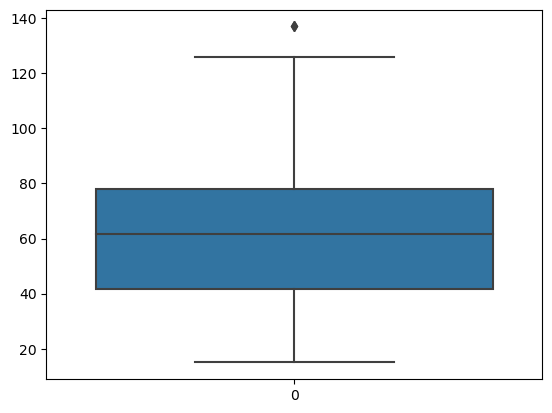

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers in 'Annual Income (k$)'
sns.boxplot(data['Annual Income (k$)'])
plt.show()
from scipy import stats
data = data[(np.abs(stats.zscore(data['Annual Income (k$)'])) < 3)] 

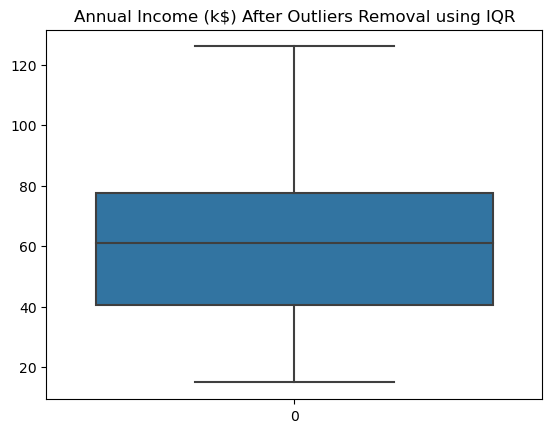

In [263]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
data_filtered = data[(data['Annual Income (k$)'] >= lower_bound) & (data['Annual Income (k$)'] <= upper_bound)]
# Plot the boxplot after filtering
sns.boxplot(data_filtered['Annual Income (k$)'])
plt.title('Annual Income (k$) After Outliers Removal using IQR')
plt.show()

## 4. Data Label Encoding (Already done in Data Preprocessing section)


In [264]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [265]:
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## 5. Scaling


In [266]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = standard_scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


In [267]:
from sklearn.model_selection import train_test_split
X = data[['Age', 'Annual Income (k$)', 'Gender']]
y = data['Spending Score (1-100)']

## 7. Logistic Regression


In [268]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Pipeline to include polynomial features
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(C=1.0, max_iter=200))
])
# Fit the pipeline
pipeline.fit(X_train, (y_train > y_train.mean()).astype(int))
# Evaluate the model
y_pred_logistic = pipeline.predict(X_test)

In [269]:
accuracy = accuracy_score((y_test > y_test.mean()).astype(int), y_pred_logistic)
print(f"Logistic Regression Accuracy : {accuracy}")

Logistic Regression Accuracy : 0.75


In [270]:
from sklearn.metrics import confusion_matrix
y_pred_logistic = logistic_model.predict(X_test)
y_test_binary = (y_test > y_test.mean()).astype(int)
conf_matrix = confusion_matrix(y_test_binary, y_pred_logistic)
conf_matrix

array([[12,  6],
       [ 6, 16]])

## 8. Visualization


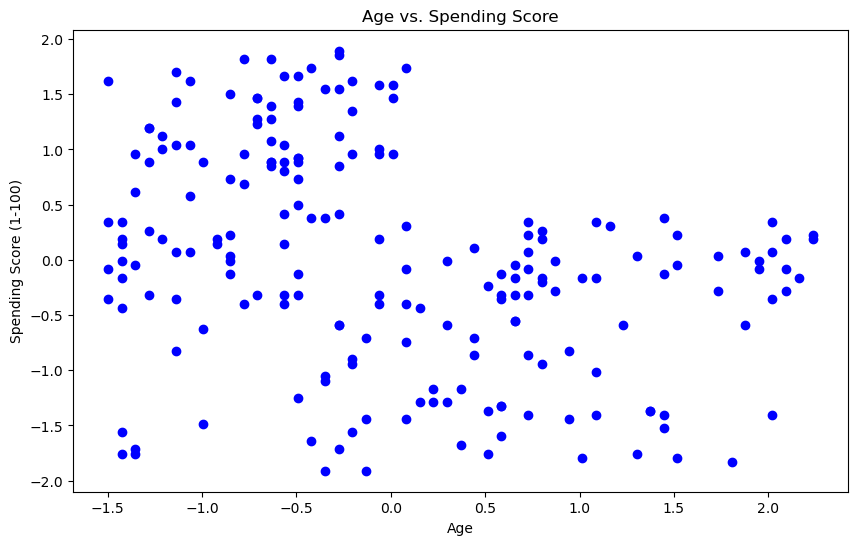

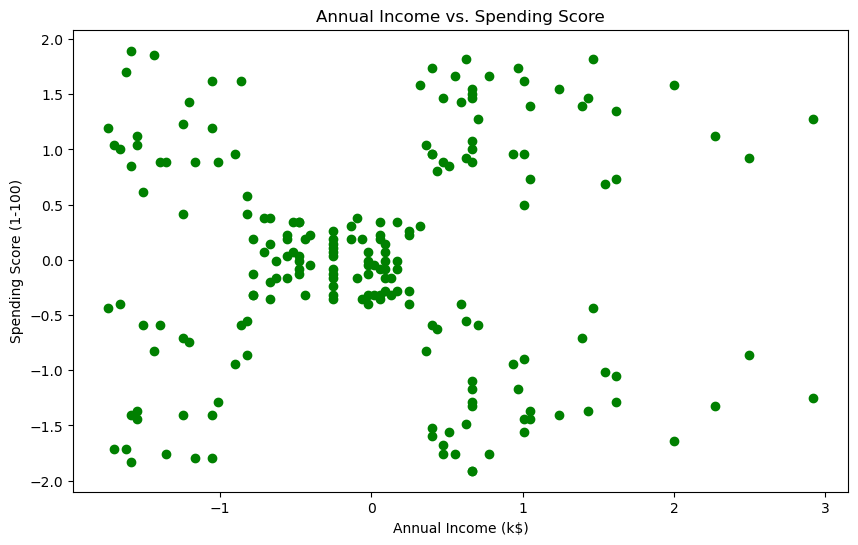

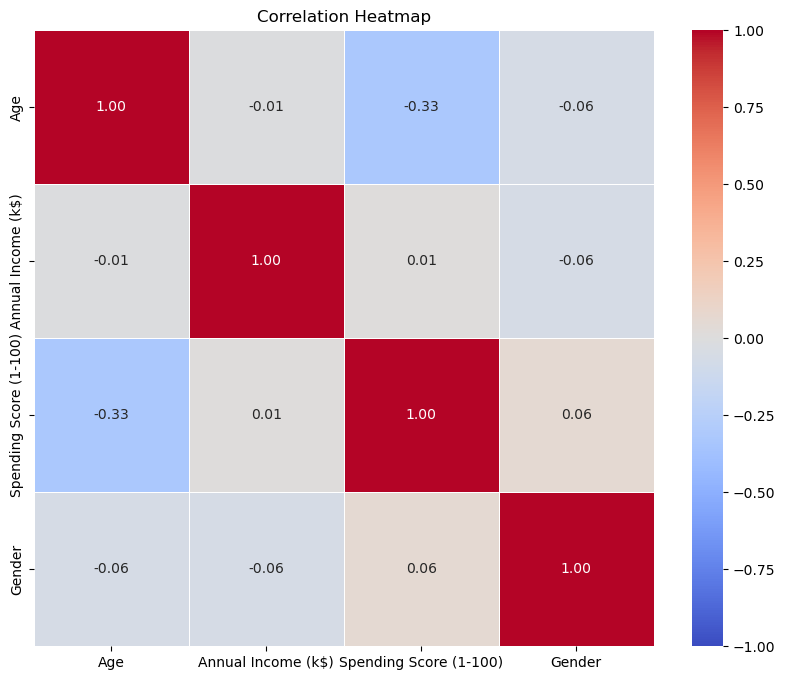

array([[12,  6],
       [ 6, 16]])

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c='blue')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs. Spending Score')
plt.show()

# Scatter plot for Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c='green')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

y_pred_logistic = logistic_model.predict(X_test)
y_test_binary = (y_test > y_test.mean()).astype(int)
conf_matrix = confusion_matrix(y_test_binary, y_pred_logistic)
conf_matrix


In [272]:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for gt in range(len(conf_matrix)):
    for pred in range(len(conf_matrix)):
        y_true += [gt] * conf_matrix[gt][pred]
        y_pred += [pred] * conf_matrix[gt][pred]

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.73      0.73      0.73        22

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

